# Resume Outcome Predictor for Data Science - EDA

## 1. Inital Overview of the Dataset

- 1000 instances
- 11 different features
- About half object types and half integers
- Target variable will be Recruiter Decision

[See the Dataset](https://www.kaggle.com/datasets/mdtalhask/ai-powered-resume-screening-dataset-2025?resource=download)

In [1]:
import sys
sys.path.append('../')

import seaborn as sns
import matplotlib.pyplot as plt

from src.data_load import extract_zip, load_csv

extract_zip()
df = load_csv()

print("Head of dataset")
print(df.head(), "\n")
print("Dataset info")
print(df.info(), "\n")
print("Dataset shape")
print(df.shape, "\n")
print("Dataset columns")
print(df.columns, "\n")

Extracted '/Users/ehagye/Documents/ResumeProject/ResumeRanker/data/raw/ResumeData.zip' to '/Users/ehagye/Documents/ResumeProject/ResumeRanker/data/interim'
Head of dataset
   Resume_ID              Name                                        Skills  \
0          1        Ashley Ali                      TensorFlow, NLP, Pytorch   
1          2      Wesley Roman  Deep Learning, Machine Learning, Python, SQL   
2          3     Corey Sanchez         Ethical Hacking, Cybersecurity, Linux   
3          4  Elizabeth Carney                   Python, Pytorch, TensorFlow   
4          5        Julie Hill                              SQL, React, Java   

   Experience (Years) Education                Certifications  \
0                  10      B.Sc                           NaN   
1                  10       MBA                     Google ML   
2                   1       MBA  Deep Learning Specialization   
3                   7    B.Tech                 AWS Certified   
4                   4 

## 2. Check for Missing Values
- Only missing values for certification feature
- This means that the job applicant does not have a certificate so they won't be removed


In [2]:
# printing total null of each feature
print("Amount of Null for each feature")
print(df.isnull().sum())

# printing percentage of null for each feature
print("\n", "Percentage of Null for each feature")
df.isnull().mean() * 100

Amount of Null for each feature
Resume_ID                   0
Name                        0
Skills                      0
Experience (Years)          0
Education                   0
Certifications            274
Job Role                    0
Recruiter Decision          0
Salary Expectation ($)      0
Projects Count              0
AI Score (0-100)            0
dtype: int64

 Percentage of Null for each feature


Resume_ID                  0.0
Name                       0.0
Skills                     0.0
Experience (Years)         0.0
Education                  0.0
Certifications            27.4
Job Role                   0.0
Recruiter Decision         0.0
Salary Expectation ($)     0.0
Projects Count             0.0
AI Score (0-100)           0.0
dtype: float64

## 3. Examine Categorical Features
- There is an even distribution of categories for almost all features

Education
B.Sc      205
MBA       202
B.Tech    200
M.Tech    198
PhD       195
Name: count, dtype: int64 

Certifications
Deep Learning Specialization    255
AWS Certified                   249
Google ML                       222
Name: count, dtype: int64 

Job Role
AI Researcher            257
Data Scientist           255
Cybersecurity Analyst    255
Software Engineer        233
Name: count, dtype: int64 

Recruiter Decision
Hire      812
Reject    188
Name: count, dtype: int64 

Skills
Python              388
SQL                 370
Ethical Hacking     206
TensorFlow          205
Machine Learning    200
NLP                 195
Linux               191
Pytorch             189
Java                188
Deep Learning       184
Cybersecurity       184
Networking          184
C++                 168
React               165
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Skills'>

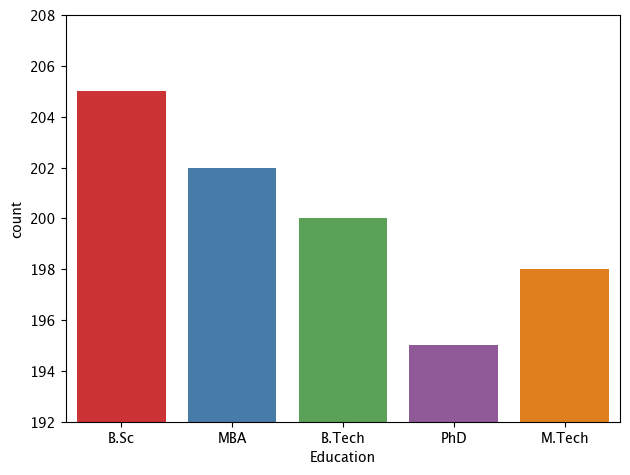

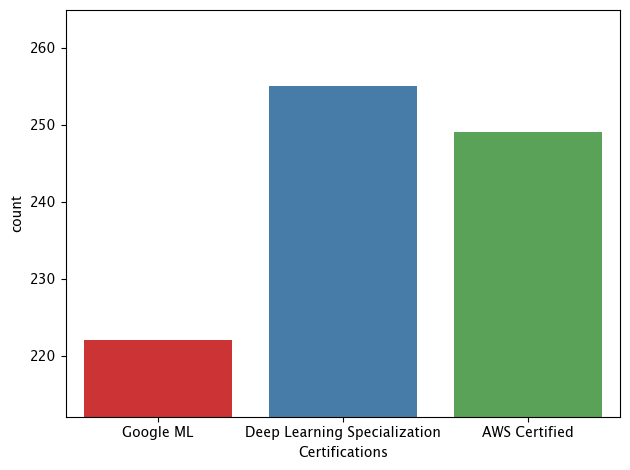

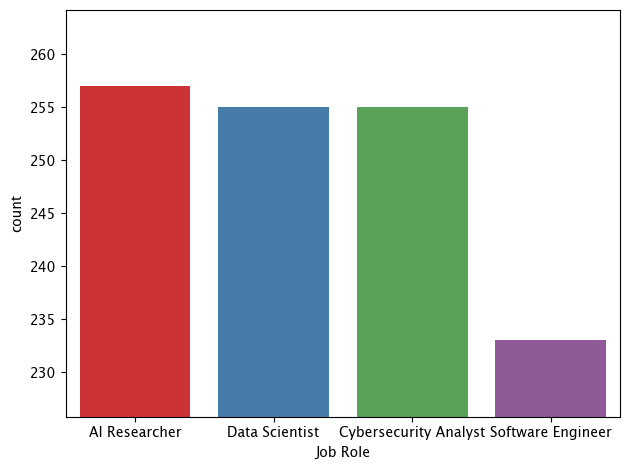

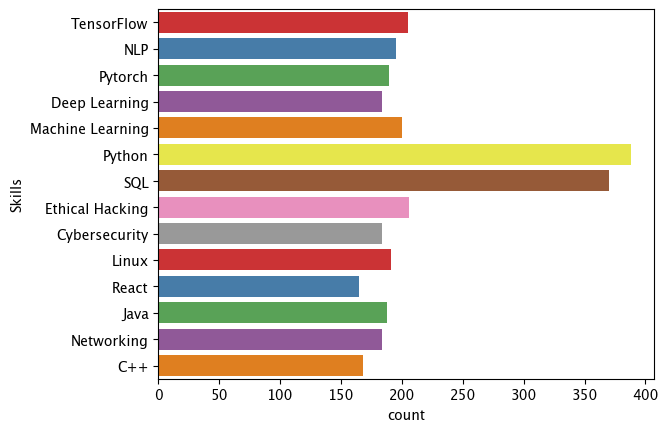

In [3]:
# printing out each categorical feature and their amounts
print(df['Education'].value_counts(), "\n")
print(df['Certifications'].value_counts(), "\n")
print(df['Job Role'].value_counts(), "\n")
print(df['Recruiter Decision'].value_counts(), "\n")
print(df['Skills'].str.split(', ').explode().value_counts())

# ploting the counts of each of the categorical features
for col in ['Education', 'Certifications', 'Job Role']:

    value_counts = df[col].value_counts()
    min_count = value_counts.min()
    max_count = value_counts.max()

    padding_range = max_count - min_count
    lower_limit = max(min_count - 0.3 * padding_range, 0)
    upper_limit = max_count + 0.3 * padding_range

    plt.figure()
    sns.countplot(x=col, hue=col, data=df, palette='Set1', legend=False)
    plt.tight_layout()
    plt.ylim(lower_limit, upper_limit)

# Graph for each of the individual skills
plt.figure()
ml_skills = df['Skills'].str.split(', ').explode()
sns.countplot(y=ml_skills, hue=ml_skills, palette='Set1', legend=False)


## 4. Examine Numeric Features
- all of these features are also very evenly distributed

       Experience (Years)  Salary Expectation ($)  Projects Count
count         1000.000000             1000.000000      1000.00000
mean             4.896000            79994.486000         5.13300
std              3.112695            23048.472549         3.23137
min              0.000000            40085.000000         0.00000
25%              2.000000            60415.750000         2.00000
50%              5.000000            79834.500000         5.00000
75%              8.000000            99583.250000         8.00000
max             10.000000           119901.000000        10.00000


[Text(0.5, 1.0, 'Salary Expectation Distribution')]

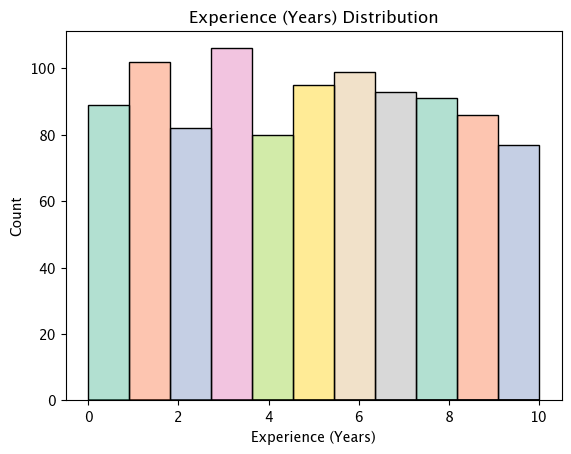

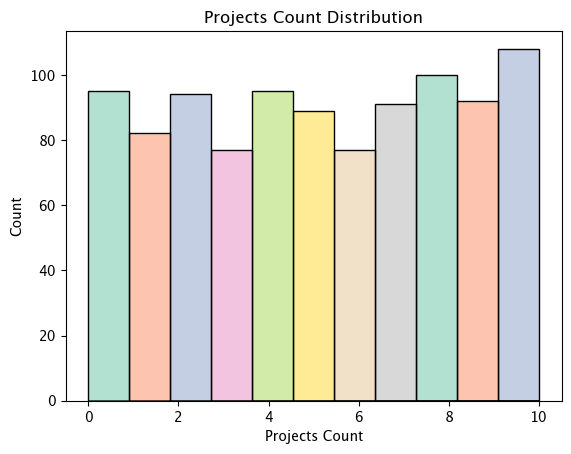

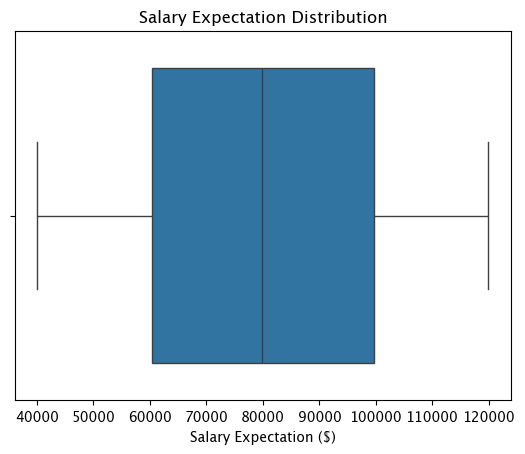

In [4]:
# printing basic data for features
print(df[['Experience (Years)', 'Salary Expectation ($)', 'Projects Count']].describe())

# creating histogram plot for each feature
for col in ['Experience (Years)', 'Projects Count']:
    plt.figure()
    sns.histplot(x=col, hue=col, data=df, kde=True, palette='Set2', legend=False).set(title=f"{col} Distribution")

# boxplot for salary expectation
plt.figure()
sns.boxplot(df['Salary Expectation ($)'], orient='h').set(title="Salary Expectation Distribution")

## Examine Target Variable
- The target variable *Recruiter Decision* is very imbalanced
- This is odd as you would normally expect there to be more applicants rejected
- Plan to fix this issue using SMOTE before training a model

Recruiter Decision
Hire      81.2
Reject    18.8
Name: proportion, dtype: float64


[Text(0.5, 1.0, 'Target Variable Distribution')]

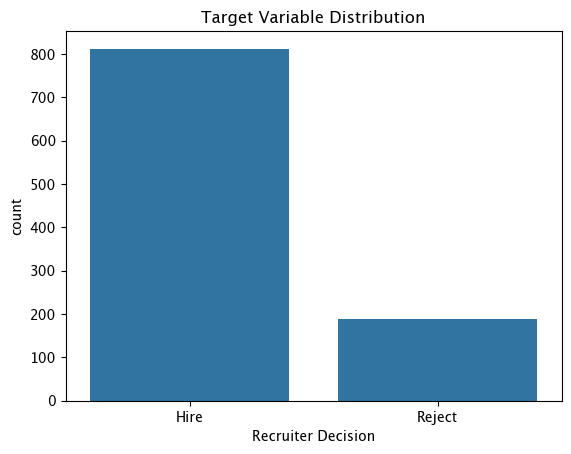

In [5]:
print(df['Recruiter Decision'].value_counts(normalize=True) * 100)

sns.countplot(x='Recruiter Decision', data=df).set(title="Target Variable Distribution")

## 6. Study Relationships Between Variables

### 6.1 Numerical vs Target
- The median years of experience for rejection is at lower vaules while median for being Hire is larger
- The same relationship is found with Projects Count as well. The more projects you complete the higher chance to be hired.

<Axes: xlabel='Recruiter Decision', ylabel='Projects Count'>

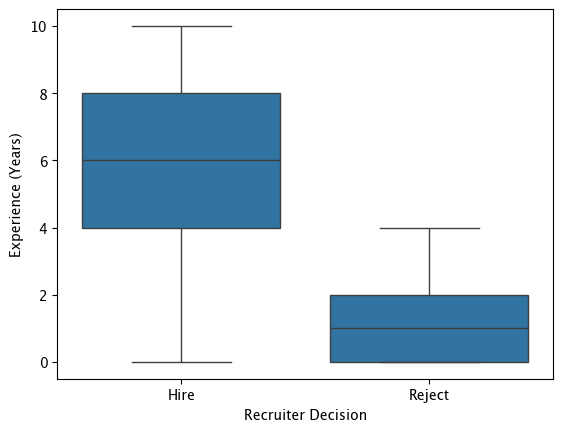

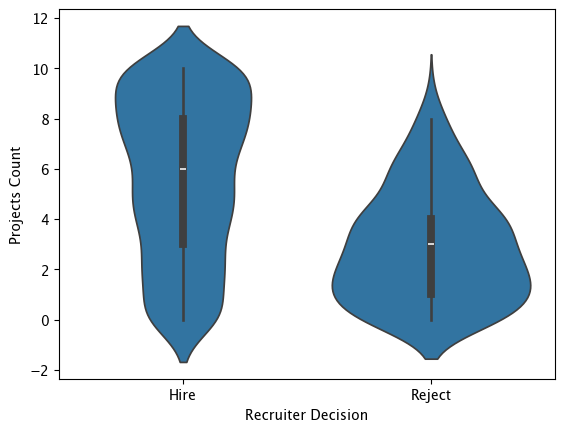

In [12]:
# boxplot for Target vrs Experience (Years)
plt.figure()
sns.boxplot(x='Recruiter Decision', y='Experience (Years)', data=df)

# violinplot for Target vrs Projects Count
plt.figure()
sns.violinplot(x='Recruiter Decision', y='Projects Count', data=df)

### 6.2 Categorical vr Target
- There is almost no difference in amounts of hire and rejections for all categorical features
- Not a good sign for the model in the future

<Axes: xlabel='Certifications', ylabel='count'>

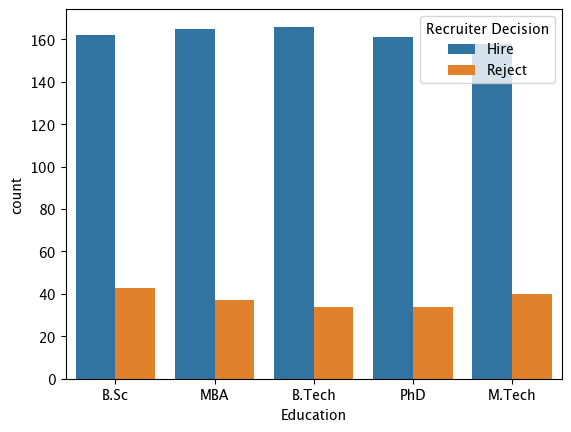

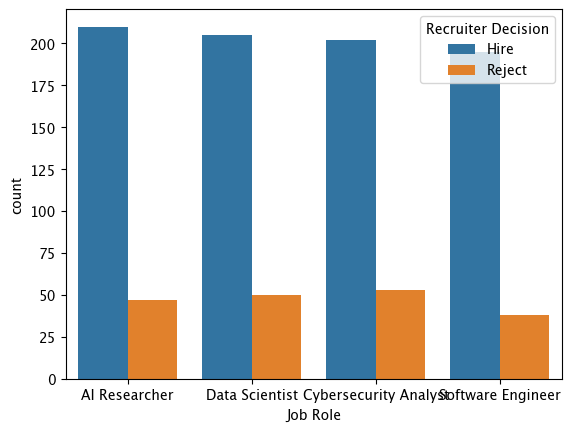

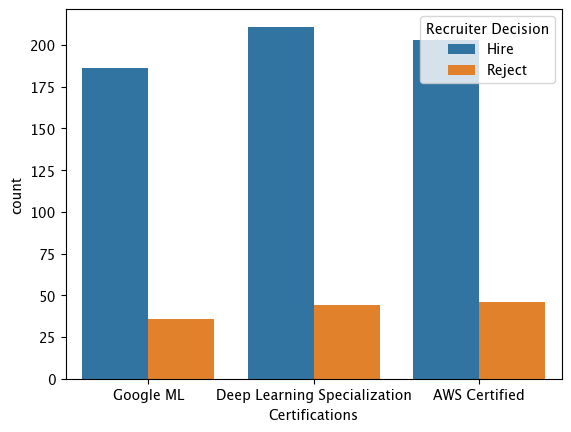

In [16]:

plt.figure()
sns.countplot(x='Education', hue='Recruiter Decision', data=df)

plt.figure()
sns.countplot(x='Job Role', hue='Recruiter Decision', data=df)

plt.figure()
sns.countplot(x='Certifications', hue='Recruiter Decision', data=df)